# Insurance Prediction

Predicting the probability of a building having an insurance claim during a certain period of time. i.e predicting the probability of a building having at least one claim over the insured period of the building.

In [1]:
# Importing the needed library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
%matplotlib inline

In [2]:
# Loading the data
train = pd.read_csv('/content/drive/MyDrive/Datasets/data-science-nigeria-2019-challenge-1-insurance-prediction/train_data.csv')
test = pd.read_csv('/content/drive/MyDrive/Datasets/data-science-nigeria-2019-challenge-1-insurance-prediction/test_data.csv')
var_desc = pd.read_csv('/content/drive/MyDrive/Datasets/data-science-nigeria-2019-challenge-1-insurance-prediction/VariableDescription.csv')
samsub = pd.read_csv('/content/drive/MyDrive/Datasets/data-science-nigeria-2019-challenge-1-insurance-prediction/SampleSubmission.csv')

In [3]:
# description of the feature
var_desc

,Variable,Description
0,Customer Id,Identification number for the Policy holder
1,YearOfObservation,year of observation for the insured policy
2,Insured_Period,duration of insurance policy in Olusola Insura...
3,Residential,is the building a residential building or not
4,Building_Painted,"is the building painted or not (N-Painted, V-N..."
5,Building_Fenced,"is the building fence or not (N-Fenced, V-Not ..."
6,Garden,building has garden or not (V-has garden; O-no...
7,Settlement,Area where the building is located. (R- rural ...
8,Building Dimension,Size of the insured building in m2
9,Building_Type,"The type of building (Type 1, 2, 3, 4)"


In [9]:
# the sample submission file
samsub.head()

,Customer Id,Claim
0,H0,1
1,H10000,1
2,H10001,1
3,H10002,1
4,H10003,1


In [25]:
train.isnull().sum()

Customer Id             0
YearOfObservation       0
Insured_Period          0
Residential             0
Building_Painted        0
Building_Fenced         0
Garden                  7
Settlement              0
Building Dimension    106
Building_Type           0
Date_of_Occupancy     508
NumberOfWindows         0
Geo_Code              102
Claim                   0
dtype: int64

In [26]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7160 entries, 0 to 7159
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer Id         7160 non-null   object 
 1   YearOfObservation   7160 non-null   int64  
 2   Insured_Period      7160 non-null   float64
 3   Residential         7160 non-null   int64  
 4   Building_Painted    7160 non-null   object 
 5   Building_Fenced     7160 non-null   object 
 6   Garden              7153 non-null   object 
 7   Settlement          7160 non-null   object 
 8   Building Dimension  7054 non-null   float64
 9   Building_Type       7160 non-null   int64  
 10  Date_of_Occupancy   6652 non-null   float64
 11  NumberOfWindows     7160 non-null   object 
 12  Geo_Code            7058 non-null   object 
 13  Claim               7160 non-null   int64  
dtypes: float64(3), int64(4), object(7)
memory usage: 783.2+ KB


In [27]:
train.shape

(7160, 14)

## Exploratory Data Analysis

In [31]:
#display the first five rows of the test data
test.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code
0,H11920,2013,1.000000,0,V,N,O,R,300.0,1,1960.0,3,3310
1,H11921,2016,0.997268,0,V,N,O,R,300.0,1,1960.0,3,3310
2,H9805,2013,0.369863,0,V,V,V,U,790.0,1,1960.0,.,3310
3,H7493,2014,1.000000,0,V,N,O,R,1405.0,1,2004.0,3,3321
4,H7494,2016,1.000000,0,V,N,O,R,1405.0,1,2004.0,3,3321


In [51]:
#display the first five rows of the train data
train.head()

,customer_id,year_obs,insured_period,residential,building_painted,building_fenced,garden,settlement,building_dimension,building_type,date_of_occupancy,win_num,geo_code,claim
0,H14663,2013,1.0,0,N,V,V,U,290.0,1,1960.0,.,1053,0
1,H2037,2015,1.0,0,V,N,O,R,490.0,1,1850.0,4,1053,0
2,H3802,2014,1.0,0,N,V,V,U,595.0,1,1960.0,.,1053,0
3,H3834,2013,1.0,0,V,V,V,U,2840.0,1,1960.0,.,1053,0
4,H5053,2014,1.0,0,V,N,O,R,680.0,1,1800.0,3,1053,0


In [3]:
#Renaming the columns
train.columns = ['customer_id', 'year_obs', 'insured_period', 'residential',
       'building_painted', 'building_fenced', 'garden', 'settlement',
       'building_dimension', 'building_type', 'date_of_occupancy',
       'win_num', 'geo_code', 'claim']

train.columns

Index(['customer_id', 'year_obs', 'insured_period', 'residential',
       'building_painted', 'building_fenced', 'garden', 'settlement',
       'building_dimension', 'building_type', 'date_of_occupancy', 'win_num',
       'geo_code', 'claim'],
      dtype='object')

In [9]:
#writing a function to plot two countplots
def countplot(first, second):
  fig, ax = plt.subplots(1, 2, figsize = [15,5])
  
  sns.countplot(x = train[first], ax = ax[0]).set_title(f"{first} distribution")
  sns.countplot(x = train[second], ax = ax[1]).set_title(f"{second} distribution")

  fig.show()

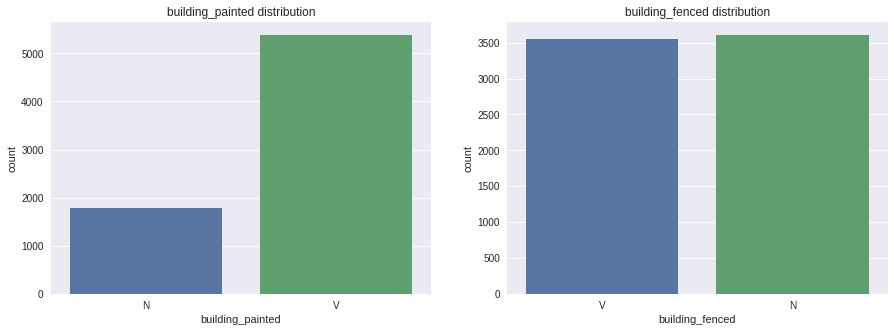

In [10]:
countplot('building_painted', 'building_fenced')

In **building_painted** column, N-Painted, V-Not Painted

In **building_fenced** column, N-Fenced, V-Not Fenced

- Most of the builings were not painted
- There is only a slight different between the number of buildngs that were not fenced and those that were fenced with the highest being those that are fenced

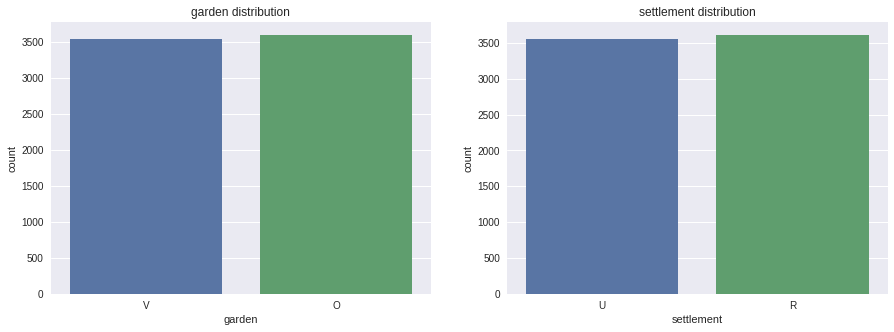

In [11]:
countplot('garden', 'settlement')

In **garden** column, V-has garden, O-no garden

In **settlement** column, R-rural area, U- urban area

- There is only a slight different between the number of buildngs with garden and those without garden. Buildings with no garden is slightly higher than those with garden.

- There is only a slight different between the number of buildngs located in urban area and those in rural area. Number of buildings located in rural area is slightly higher than those in urban areas.

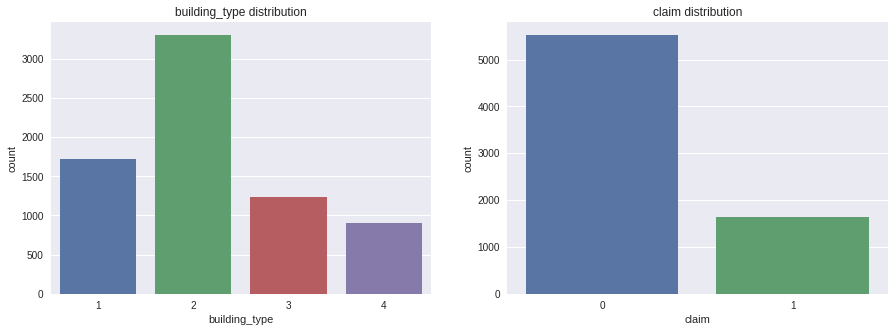

In [12]:
countplot('building_type', 'claim')  

- Building type **2** has the highest frequency
- Most of the Buldings has no insurance claim

In [15]:
def countplott(first, second, third):
  fig, ax = plt.subplots(1, 2, figsize = [15,5])
  
  sns.countplot(x = train[first], hue = train[second], ax = ax[0]).set_title(f"claim hued by {second}")
  sns.countplot(x = train[first], hue = train[third], ax = ax[1]).set_title(f"claim hued by {third}")

  fig.show()

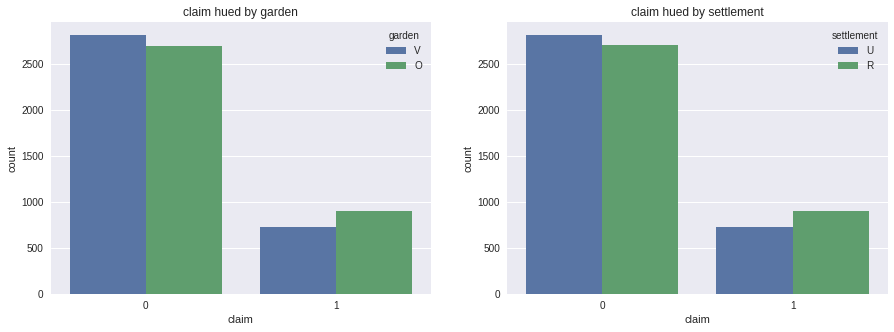

In [16]:
countplott('claim', 'garden', 'settlement')

- Most of the houses with garden has no insurance claim while most of the garden without garden has insurance claim

- Most of the houses in Urban areas has no insurance claim while most of the houses in rural areas has insurance claim

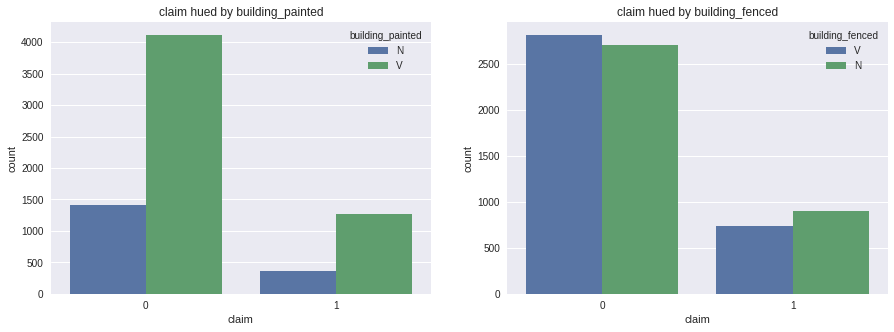

In [17]:
countplott('claim', 'building_painted', 'building_fenced')

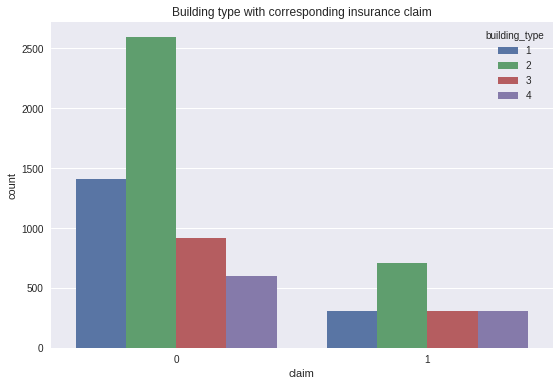

In [22]:
plt.figure(figsize = (9,6))
sns.countplot(x = train['claim'],hue = train['building_type']).set_title("Building type with corresponding insurance claim")
plt.show()

In [63]:
train.head()

,customer_id,year_obs,insured_period,residential,building_painted,building_fenced,garden,settlement,building_dimension,building_type,date_of_occupancy,win_num,geo_code,claim
0,H14663,2013,1.0,0,N,V,V,U,290.0,1,1960.0,.,1053,0
1,H2037,2015,1.0,0,V,N,O,R,490.0,1,1850.0,4,1053,0
2,H3802,2014,1.0,0,N,V,V,U,595.0,1,1960.0,.,1053,0
3,H3834,2013,1.0,0,V,V,V,U,2840.0,1,1960.0,.,1053,0
4,H5053,2014,1.0,0,V,N,O,R,680.0,1,1800.0,3,1053,0


In [28]:
missing_col = [col for col in train.columns 
               if train[col].isnull().any()]
missing_col

['Garden', 'Building Dimension', 'Date_of_Occupancy', 'Geo_Code']

In [8]:
train.columns

Index(['Customer Id', 'YearOfObservation', 'Insured_Period', 'Residential',
       'Building_Painted', 'Building_Fenced', 'Garden', 'Settlement',
       'Building Dimension', 'Building_Type', 'Date_of_Occupancy',
       'NumberOfWindows', 'Geo_Code', 'Claim'],
      dtype='object')

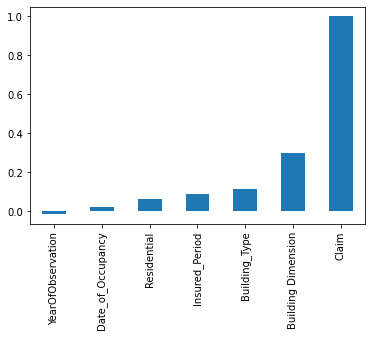

In [16]:
train.corr()['Claim'].sort_values().plot(kind = 'bar')